In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
import os
os.getcwd()
os.chdir(r'C:\Users\rahul_000\Downloads')

# 1 Question

In [3]:
df_prices = pd.read_csv('prices.csv')
df_auditors = pd.read_csv('auditors.csv')

In [5]:
# EDA
df_prices.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/17,24.95,66999,268588472
1,234,10/27/17,49.71,66999,475245085
2,234,10/20/17,25.75,66999,126967843
3,234,10/23/17,18.81,66999,708930835
4,234,10/23/17,33.32,66999,325885139


In [6]:
# EDA
df_auditors.head()

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


In [7]:
# import json file into dataframe
df_stores = pd.read_json(r'stores.json')
df_stores.head()

,Banner,Region,Store ID
0,Walmart,Northern California,66999
1,Trader Joes,Northern California,4698
2,Safeway,Northern California,39482
3,Whole Foods,Northern California,34957
4,Walmart,New York,12837


In [8]:
df1 = pd.merge(df_prices, df_auditors, on='Auditor ID')
df2 = pd.merge(df1, df_stores, on='Store ID')

In [9]:
df2.columns

Index(['Auditor ID', 'Date', 'Price', 'Store ID', 'UPC', 'First', 'Last',
       'Region_x', 'Banner', 'Region_y'],
      dtype='object')

In [10]:
df2.head()

,Auditor ID,Date,Price,Store ID,UPC,First,Last,Region_x,Banner,Region_y
0,234,10/18/17,24.95,66999,268588472,Sue,Smith,Northern California,Walmart,Northern California
1,234,10/27/17,49.71,66999,475245085,Sue,Smith,Northern California,Walmart,Northern California
2,234,10/20/17,25.75,66999,126967843,Sue,Smith,Northern California,Walmart,Northern California
3,234,10/23/17,18.81,66999,708930835,Sue,Smith,Northern California,Walmart,Northern California
4,234,10/23/17,33.32,66999,325885139,Sue,Smith,Northern California,Walmart,Northern California


In [11]:
df_final = df2[['Banner','UPC','Region_x','Price']]

In [12]:
df_final.head()

,Banner,UPC,Region_x,Price
0,Walmart,268588472,Northern California,24.95
1,Walmart,475245085,Northern California,49.71
2,Walmart,126967843,Northern California,25.75
3,Walmart,708930835,Northern California,18.81
4,Walmart,325885139,Northern California,33.32


In [13]:
trans_df = pd.pivot_table(df_final,index=["Banner","UPC"],values=["Price"],
               columns=["Region_x"], fill_value= '-')
trans_df.head()

Price                                    
Region_x         Kansas New York Northern California  Texas
Banner  UPC                                                
Safeway 11873171      -     6.09                   -   5.19
        15052612  53.99        -                   -  54.49
        16482322  17.89        -                   -  18.09
        16729338   7.99     9.39                   -   8.09
        16829288   3.59     4.19                   -   3.59

# Below df answers Question 1

In [14]:
trans_df_final = trans_df.reset_index()
trans_df_final.head()

Banner       UPC  Price                                    
Region_x                    Kansas New York Northern California  Texas
0         Safeway  11873171      -     6.09                   -   5.19
1         Safeway  15052612  53.99        -                   -  54.49
2         Safeway  16482322  17.89        -                   -  18.09
3         Safeway  16729338   7.99     9.39                   -   8.09
4         Safeway  16829288   3.59     4.19                   -   3.59

In [195]:
#trans_df_final.describe()

In [16]:
#To check what datatypes does each column has
df2.dtypes

Auditor ID      int64
Date           object
Price         float64
Store ID        int64
UPC             int64
First          object
Last           object
Region_x       object
Banner         object
Region_y       object
dtype: object

In [17]:
#find the duplicate rows
dups = df2[df2.duplicated()]
print("The number of duplicates:", dups)

The number of duplicates: Empty DataFrame
Columns: [Auditor ID, Date, Price, Store ID, UPC, First, Last, Region_x, Banner, Region_y]
Index: []


In [18]:
x = trans_df_final.drop_duplicates()
print(x.shape)
print(trans_df_final.shape)

(4931, 6)
(4931, 6)


In [19]:
print(df2.isnull().sum())

Auditor ID    0
Date          0
Price         0
Store ID      0
UPC           0
First         0
Last          0
Region_x      0
Banner        0
Region_y      0
dtype: int64


In [29]:
#sns.boxplot(x=trans_df_final["Price"])

In [108]:
trans_df_final.columns
trans_df_final["Price"].describe()

Region_x,Kansas,New York,Northern California,Texas
count,4931,4931,4931,4931
unique,1103,1419,909,1157
top,-,-,-,-
freq,1844,1600,3603,1166


# 2 Question

In [77]:
#sns.boxplot(x=m)
Kansas = trans_df_final["Price"]['Kansas']
Kansas_d = [Kansas for Kansas in Kansas if str(Kansas) != '-']

New_York = trans_df_final["Price"]['New York']
New_York_d = [New_York for New_York in New_York if str(New_York) != '-']

NCal = trans_df_final["Price"]['Northern California']
NCal_d = [NCal for NCal in NCal if str(NCal) != '-']

Texas = trans_df_final["Price"]['Texas']
Texas_d = [Texas for Texas in Texas if str(Texas) != '-']


# Looking at distribution graphs we see that Kansas is highly right skewed because of anomoly spike and while other 3 regions are closely normally distributed, 

## so this indicates region and store multiplier factors are taken in trade off for WholeFoods in Kansas.

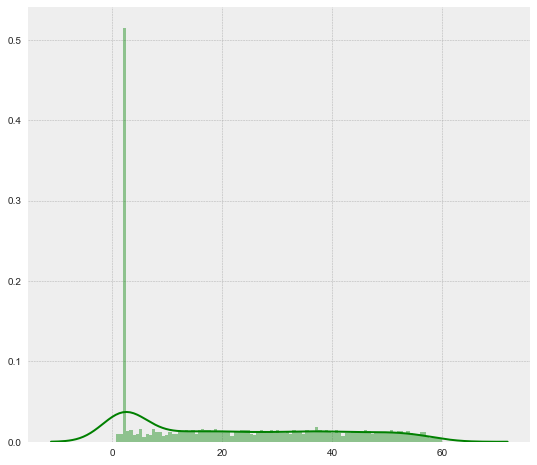

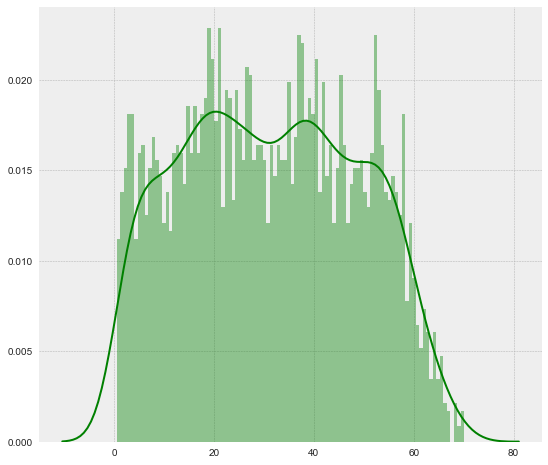

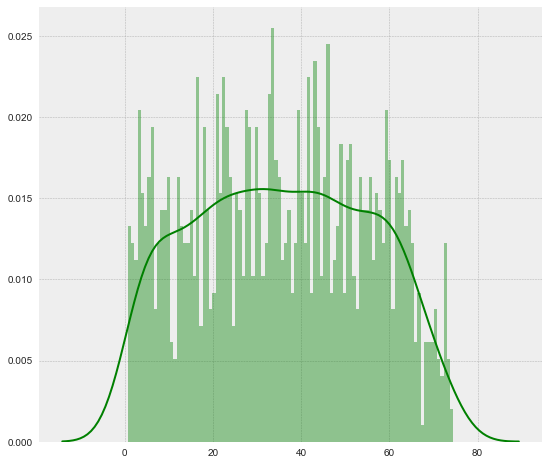

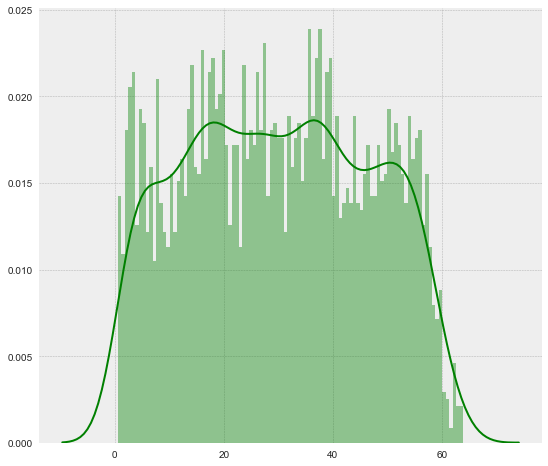

In [79]:
plt.figure(figsize=(9, 8))
sns.distplot(Kansas_d, color='g', bins=100, hist_kws={'alpha': 0.4})

plt.figure(figsize=(9, 8))
sns.distplot(New_York_d, color='g', bins=100, hist_kws={'alpha': 0.4})

plt.figure(figsize=(9, 8))
sns.distplot(NCal_d, color='g', bins=100, hist_kws={'alpha': 0.4})

plt.figure(figsize=(9, 8))
sns.distplot(Texas_d, color='g', bins=100, hist_kws={'alpha': 0.4})

# Kansas Outlier/anomoly analysis (Store and region multiplier)

#### below graph shows anomoly prices between 2 and 1.8 has high frequency

In [191]:
myarray = np.asarray(Kansas_d)
centroid = myarray.mean(axis=0)
centroid

21.390197602850662

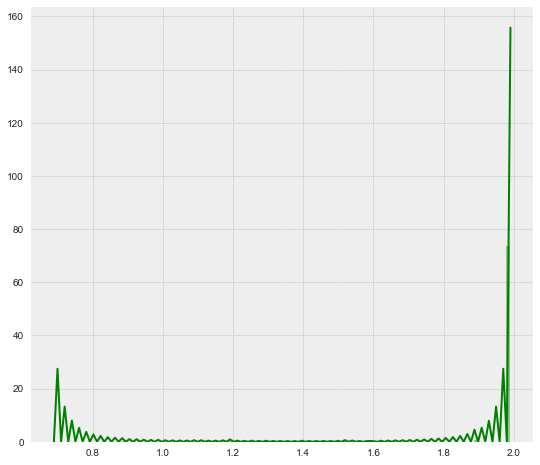

In [106]:
## kansas has frequency spike for prices below 2
j2 = [i for i in Kansas_d if i <= 2]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})


#### below graph shows removing anomolies, the rest of the distribution is pretty close to normal

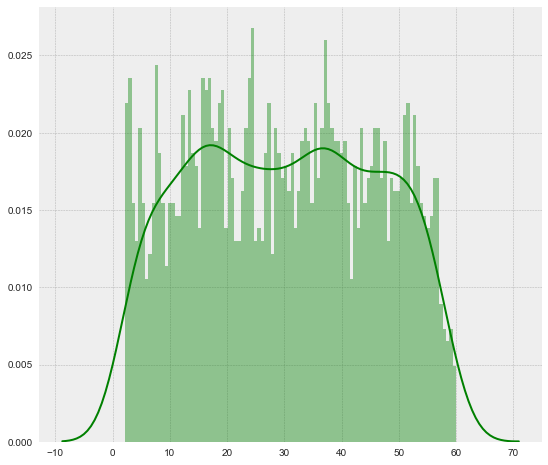

In [193]:
## kansas for prices > 2
j2less = [i for i in Kansas_d if i > 2]
plt.figure(figsize=(9, 8))
sns.distplot(j2less, color='g', bins=100, hist_kws={'alpha': 0.4})

In [194]:
myarray = np.asarray(j2less)
centroid = myarray.mean(axis=0)
centroid

30.131709722874589

In [115]:
# replave - with nan
out = trans_df_final.replace('-', np.nan)

In [185]:
out2 = out[2>=out['Price']['Kansas']]

In [186]:
out2less = out[2<out['Price']['Kansas']]
#out2less

In [139]:
out2less['Banner'].value_counts()
print("Safeway is ")

Safeway        799
Walmart        572
Wegmans        380
Trader Joes    378
Name: Banner, dtype: int64

#### below datapoints shows that whole foods in kansas is price sensitive and has products only below 2 and none greater than 2. this shows wholefoods might have adjusted its store multiplier and region multiplier to lower values. 

#### Or whole foods has no higher price items inventory in stock

In [137]:
out2['Banner'].value_counts()

Whole Foods    913
Safeway         20
Walmart         13
Wegmans          9
Trader Joes      3
Name: Banner, dtype: int64

# for New York

In [187]:
myarray = np.asarray(New_York_d)
centroid = myarray.mean(axis=0)
centroid

31.368156709696791

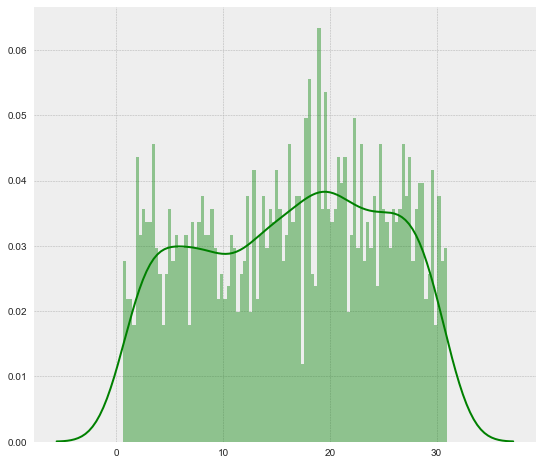

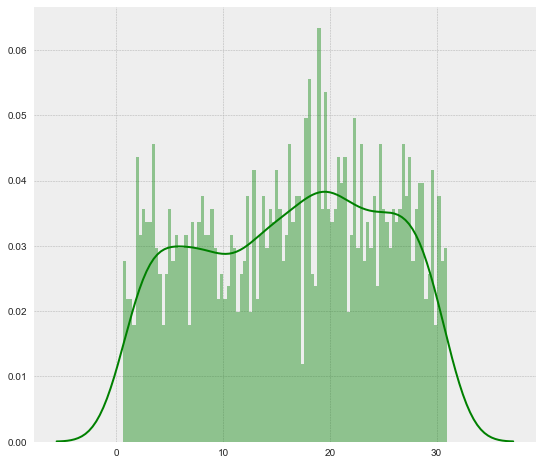

In [190]:
##  new york has half distribution around 31
j2 = [i for i in New_York_d if i <= 31]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})

##  new york has half distribution around 31
j2 = [i for i in New_York_d if i <= 31]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})


In [188]:
out31 = out[31>=out['Price']['New York']]
out31less = out[31<out['Price']['New York']]
print("Prices distribution less than 31 \n ")
print(out31['Banner'].value_counts())
print("\n\nPrices distribution greater than 31 \n ")
print(out31less['Banner'].value_counts())

Prices distribution less than 31 
 
Walmart        473
Wegmans        467
Whole Foods    391
Trader Joes    190
Safeway        139
Name: Banner, dtype: int64


Prices distribution greater than 31 
 
Wegmans        466
Whole Foods    460
Walmart        386
Trader Joes    192
Safeway        167
Name: Banner, dtype: int64


In [189]:
##less than 2 price distribution
out31 = out[2>=out['Price']['New York']]
out31less = out[2<out['Price']['New York']]
print("Prices distribution less than 2 \n ")
print(out31['Banner'].value_counts())
print("\n\nPrices distribution greater than 2 \n ")
print(out31less['Banner'].value_counts())

Prices distribution less than 2 
 
Wegmans        20
Walmart        20
Whole Foods    11
Trader Joes     8
Safeway         2
Name: Banner, dtype: int64


Prices distribution greater than 2 
 
Wegmans        913
Whole Foods    840
Walmart        839
Trader Joes    374
Safeway        304
Name: Banner, dtype: int64


# for NCal

In [178]:
myarray = np.asarray(NCal_d)
centroid = myarray.mean(axis=0)
centroid

35.471310240963859

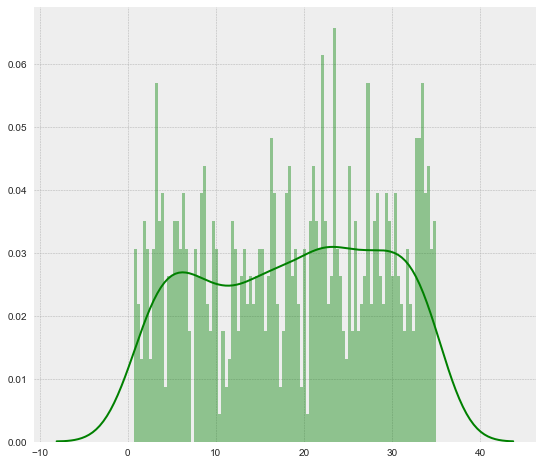

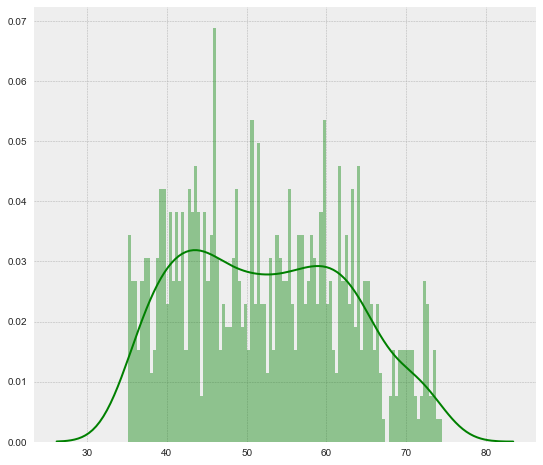

In [180]:
## NCal has half distribution around 35
j2 = [i for i in NCal_d if i <= 35]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})

## NCal has half distribution around 35
j2 = [i for i in NCal_d if i >= 35]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})


In [168]:
out30 = out[30>=out['Price']['Northern California']]
out30less = out[30<out['Price']['Northern California']]
print("Prices distribution less than 30 \n ")
print(out30['Banner'].value_counts())
print("\n\nPrices distribution greater than 30 \n ")
print(out30less['Banner'].value_counts())

Prices less than 30 
 
Walmart        461
Wegmans        453
Whole Foods    375
Trader Joes    188
Safeway        135
Name: Banner, dtype: int64


Prices greater than 30 
 
Wegmans        480
Whole Foods    476
Walmart        398
Trader Joes    194
Safeway        171
Name: Banner, dtype: int64


In [167]:
##less than 2 price distribution
out30 = out[2>=out['Price']['Northern California']]
out30less = out[2<out['Price']['Northern California']]
print("Prices distribution less than 2 \n ")
print(out30['Banner'].value_counts())
print("\n\nPrices distribution greater than 2 \n ")
print(out30less['Banner'].value_counts())

Prices less than 2 
 
Wegmans        20
Walmart        20
Whole Foods    11
Trader Joes     8
Safeway         2
Name: Banner, dtype: int64


Prices greater than 2 
 
Wegmans        913
Whole Foods    840
Walmart        839
Trader Joes    374
Safeway        304
Name: Banner, dtype: int64


# Texas

In [177]:
myarray = np.asarray(Texas_d)
centroid = myarray.mean(axis=0)
centroid

30.084549800796815

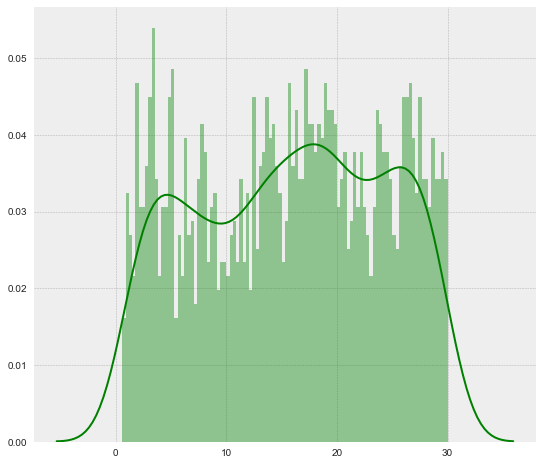

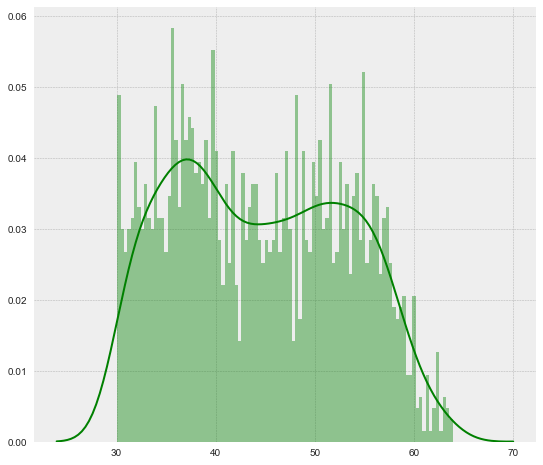

In [181]:
## Texas has half distribution around 30
j2 = [i for i in Texas_d if i <= 30]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})

## Texas has half distribution around 30
j2 = [i for i in Texas_d if i >= 30]
plt.figure(figsize=(9, 8))
sns.distplot(j2, color='g', bins=100, hist_kws={'alpha': 0.4})


In [183]:
out30 = out[30>=out['Price']['Texas']]
out30less = out[30<out['Price']['Texas']]
print("Prices distribution less than 30 \n ")
print(out30['Banner'].value_counts())
print("\n\nPrices distribution greater than 30 \n ")
print(out30less['Banner'].value_counts())

Prices less than 30 
 
Wegmans        467
Trader Joes    458
Safeway        416
Walmart        308
Whole Foods    242
Name: Banner, dtype: int64


Prices greater than 30 
 
Wegmans        460
Trader Joes    440
Safeway        422
Whole Foods    281
Walmart        271
Name: Banner, dtype: int64


In [184]:
##less than 2 price distribution
out30 = out[2>=out['Price']['Texas']]
out30less = out[2<out['Price']['Texas']]
print("Prices distribution less than 2 \n ")
print(out30['Banner'].value_counts())
print("\n\nPrices distribution greater than 2 \n ")
print(out30less['Banner'].value_counts())

Prices less than 2 
 
Wegmans        22
Safeway        20
Trader Joes    20
Walmart        12
Whole Foods     6
Name: Banner, dtype: int64


Prices greater than 2 
 
Wegmans        905
Trader Joes    878
Safeway        818
Walmart        567
Whole Foods    517
Name: Banner, dtype: int64


# The Study Ends Here!
